<a href="https://colab.research.google.com/github/liliakurghinyan/movie_dataset/blob/main/movie_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

harshitshankhdhar_imdb_dataset_of_top_1000_movies_and_tv_shows_path = kagglehub.dataset_download('harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows')
liliakurghinyan_movie_dataset_path = kagglehub.dataset_download('liliakurghinyan/movie-dataset')

print('Data source import complete.')


100%|██████████| 175k/175k [00:00<00:00, 495kB/s]

Extracting files...


KaggleApiHTTPError: 403 Client Error.

You don't have permission to access resource at URL: https://www.kaggle.com/datasets/liliakurghinyan/movie-dataset
Please make sure you are authenticated if you are trying to access a private resource or a resource requiring consent.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

df = pd.read_csv("/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [ ]:
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
df.describe()

,Released_Year,IMDB_Rating,Meta_score,No_of_Votes
count,999.000000,1000.000000,843.000000,1.000000e+03
mean,1991.217217,7.949300,77.971530,2.736929e+05
std,23.297025,0.275491,12.376099,3.273727e+05
min,1920.000000,7.600000,28.000000,2.508800e+04
25%,1976.000000,7.700000,70.000000,5.552625e+04
50%,1999.000000,7.900000,79.000000,1.385485e+05
75%,2009.000000,8.100000,87.000000,3.741612e+05
max,2020.000000,9.300000,100.000000,2.343110e+06


In [ ]:
df


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994.0,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972.0,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008.0,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974.0,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957.0,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961.0,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956.0,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953.0,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944.0,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


# step 1: finding missing and duplicated values

In [ ]:
df.isnull().any()

Poster_Link      False
Series_Title     False
Released_Year     True
Certificate       True
Runtime          False
Genre            False
IMDB_Rating      False
Overview         False
Meta_score        True
Director         False
Star1            False
Star2            False
Star3            False
Star4            False
No_of_Votes      False
Gross             True
dtype: bool

In [ ]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      1
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [ ]:
df.duplicated().sum()

0

# let's get rid of that movies, that do not have gross

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  999 non-null    float64
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(3), int64(1), object(12)
memory usage: 125.1+ KB


In [ ]:

df.describe()  # Check the statistics of the 'Gross' column


,Released_Year,IMDB_Rating,Meta_score,No_of_Votes
count,999.000000,1000.000000,843.000000,1.000000e+03
mean,1991.217217,7.949300,77.971530,2.736929e+05
std,23.297025,0.275491,12.376099,3.273727e+05
min,1920.000000,7.600000,28.000000,2.508800e+04
25%,1976.000000,7.700000,70.000000,5.552625e+04
50%,1999.000000,7.900000,79.000000,1.385485e+05
75%,2009.000000,8.100000,87.000000,3.741612e+05
max,2020.000000,9.300000,100.000000,2.343110e+06


In [ ]:

#df['Gross'] = df['Gross'].str.replace(',', '', regex=True)
df['Gross'].dtype
df['Gross']

0       28,341,469
1      134,966,411
2      534,858,444
3       57,300,000
4        4,360,000
          ...     
995            NaN
996            NaN
997     30,500,000
998            NaN
999            NaN
Name: Gross, Length: 1000, dtype: object

In [ ]:
df['Gross'] = df['Gross'].fillna(0)
df['Gross']

0       28,341,469
1      134,966,411
2      534,858,444
3       57,300,000
4        4,360,000
          ...     
995              0
996              0
997     30,500,000
998              0
999              0
Name: Gross, Length: 1000, dtype: object

# let's start some data visualization part, for example create a grapgh, for Distribution of movie ratings

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


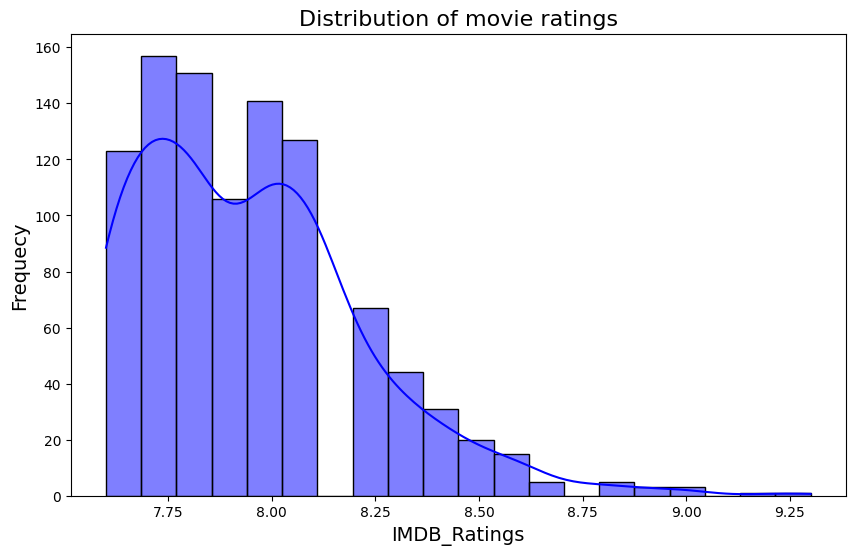

In [ ]:
plt.figure(figsize = (10,6))

sns.histplot(df['IMDB_Rating'], bins=20, kde = True, color='blue')

plt.title('Distribution of movie ratings', fontsize = 16)
plt.xlabel('IMDB_Ratings', fontsize = 14)
plt.ylabel('Frequecy', fontsize = 14)

plt.show()

In [ ]:
df[df['IMDB_Rating']>8]['IMDB_Rating']

0      9.3
1      9.2
2      9.0
3      9.0
4      9.0
      ... 
317    8.1
318    8.1
319    8.1
320    8.1
321    8.1
Name: IMDB_Rating, Length: 322, dtype: float64

In [ ]:
# Convert 'Released_Year' to numeric (if necessary)
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')


In [ ]:
df['Released_Year_Cut'] = pd.qcut(df['Released_Year'],8)


In [ ]:
df['Released_Year_Cut']

0        (1991.0, 1999.0]
1        (1959.0, 1976.0]
2        (2004.0, 2009.0]
3        (1959.0, 1976.0]
4      (1919.999, 1959.0]
              ...        
995      (1959.0, 1976.0]
996    (1919.999, 1959.0]
997    (1919.999, 1959.0]
998    (1919.999, 1959.0]
999    (1919.999, 1959.0]
Name: Released_Year_Cut, Length: 1000, dtype: category
Categories (8, interval[float64, right]): [(1919.999, 1959.0] < (1959.0, 1976.0] < (1976.0, 1991.0] < (1991.0, 1999.0] < (1999.0, 2004.0] < (2004.0, 2009.0] < (2009.0, 2014.0] < (2014.0, 2020.0]]

In [ ]:
df['Released_Year_range'] = df['Released_Year']

df.loc[df['Released_Year']<=1920,'Released_Year_range'] = 0
df.loc[(df['Released_Year']>1920)& (df['Released_Year']<=1967), 'Released_Year_range'] = 1
df.loc[(df['Released_Year']>1967)& (df['Released_Year']<=1984), 'Released_Year_range'] = 2
df.loc[(df['Released_Year']>1984)& (df['Released_Year']<=1993), 'Released_Year_range'] = 3
df.loc[(df['Released_Year']>1993)& (df['Released_Year']<=2000), 'Released_Year_range'] = 4
df.loc[(df['Released_Year']>2000)& (df['Released_Year']<=2005), 'Released_Year_range'] = 4
df.loc[(df['Released_Year']>2005)& (df['Released_Year']<=2010), 'Released_Year_range'] = 5
df.loc[(df['Released_Year']>2010)& (df['Released_Year']<=2014), 'Released_Year_range'] = 6
df.loc[(df['Released_Year']>2014)& (df['Released_Year']<=2019), 'Released_Year_range'] = 7
df.loc[df['Released_Year']>2019, 'Released_Year_range']


df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Released_Year_Cut,Released_Year_range
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994.0,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469","(1991.0, 1999.0]",4.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972.0,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411","(1959.0, 1976.0]",2.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008.0,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444","(2004.0, 2009.0]",5.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974.0,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000","(1959.0, 1976.0]",2.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957.0,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000","(1919.999, 1959.0]",1.0


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


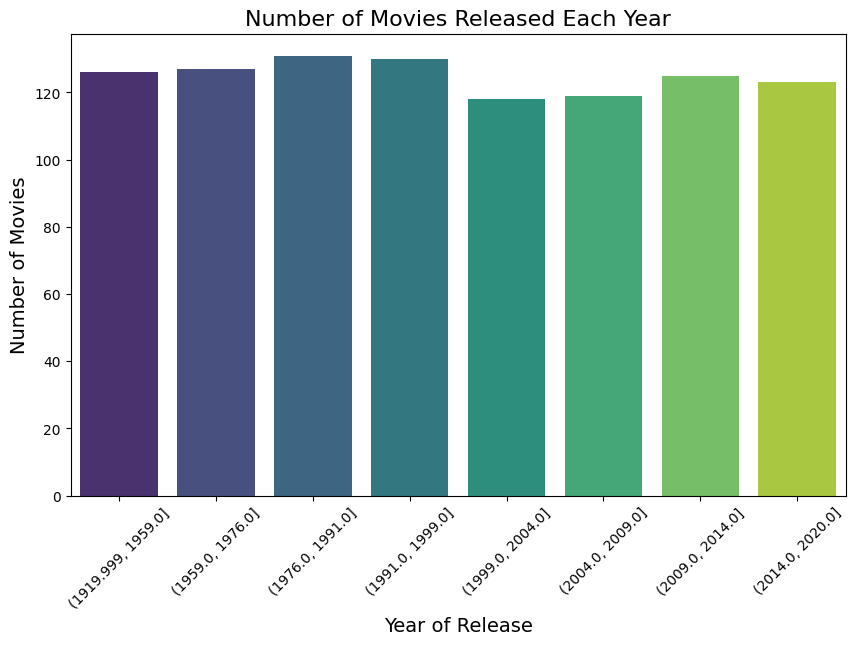

In [ ]:
plt.figure(figsize = (10,6))

sns.countplot(data = df, x='Released_Year_Cut', palette = 'viridis')

plt.title('Number of Movies Released Each Year', fontsize=16)
plt.xlabel('Year of Release', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)

# Rotate x-ticks for better readability if there are many years
plt.xticks(rotation=45)

# Show the plot
plt.show()


Movie Count by Year

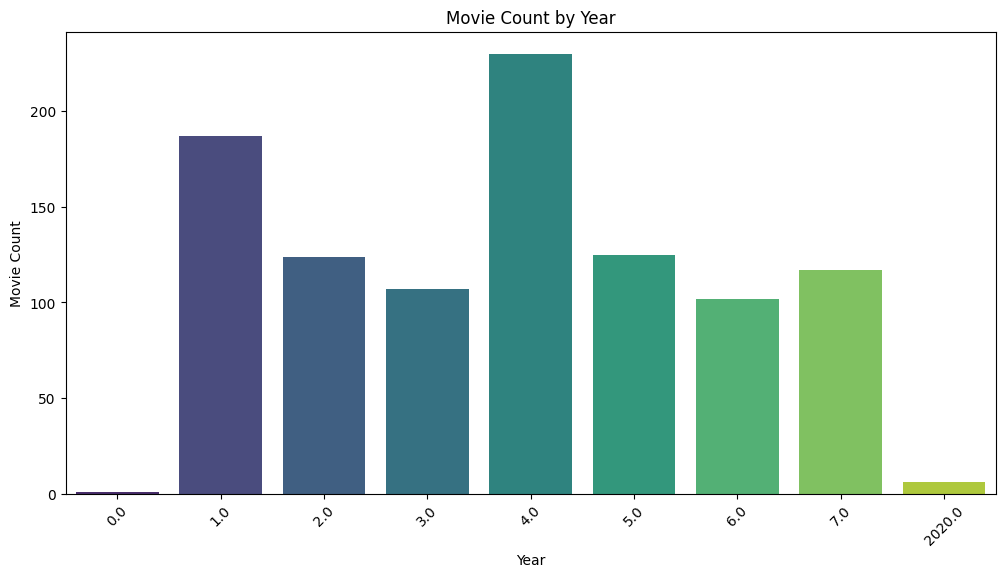

In [ ]:
plt.figure(figsize = (12,6))

sns.countplot(data=df, x='Released_Year_range', palette = 'viridis')

plt.xticks(rotation = 45)

plt.title('Movie Count by Year')
plt.xlabel('Year')
plt.ylabel('Movie Count')

plt.show()

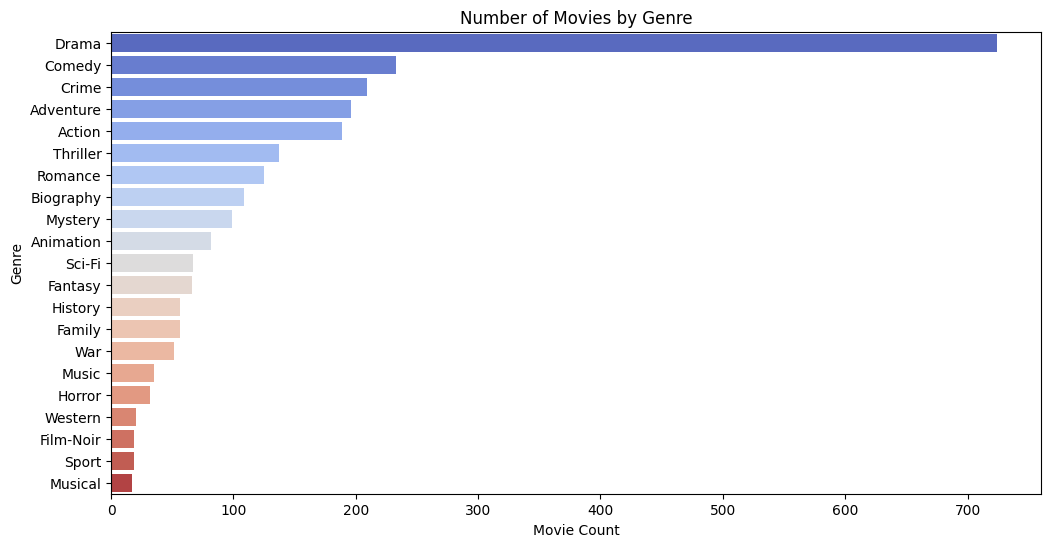

In [ ]:
# Step 1: Split the 'Genre' column by commas
df['Genre'] = df['Genre'].str.split(', ')

# Step 2: Explode the list of genres into separate rows
df_exploded = df.explode('Genre')

# Step 3: Create a count plot of the individual genres
plt.figure(figsize=(12, 6))
sns.countplot(data=df_exploded, y='Genre', order=df_exploded['Genre'].value_counts().index, palette='coolwarm')

# Add title and labels
plt.title('Number of Movies by Genre')
plt.xlabel('Movie Count')
plt.ylabel('Genre')

# Show the plot
plt.show()

In [ ]:

df['IMDB_Rating'].describe()

count    1000.000000
mean        7.949300
std         0.275491
min         7.600000
25%         7.700000
50%         7.900000
75%         8.100000
max         9.300000
Name: IMDB_Rating, dtype: float64

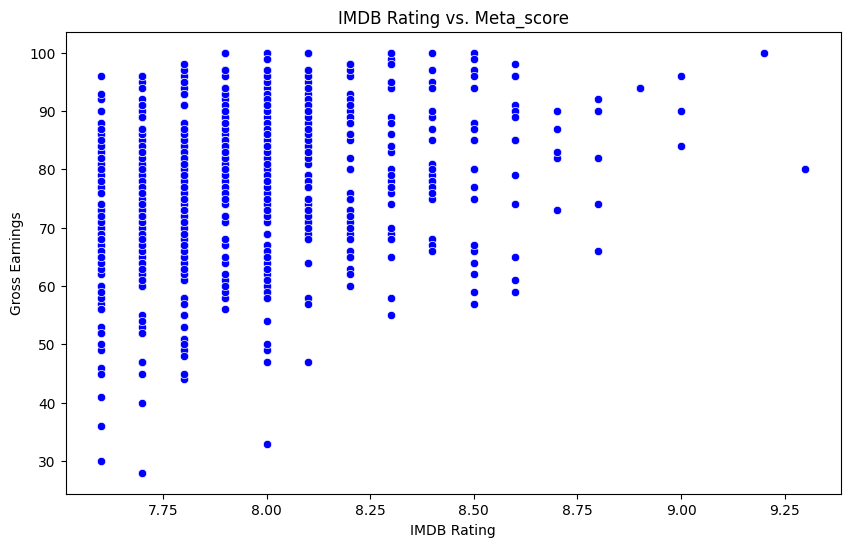

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='IMDB_Rating', y='Meta_score', color='blue')
plt.title('IMDB Rating vs. Meta_score')
plt.xlabel('IMDB Rating')
plt.ylabel('Gross Earnings')
plt.show()


In [ ]:
df


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Released_Year_Cut,Released_Year_range
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994.0,A,142 min,[Drama],9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469","(1991.0, 1999.0]",4.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972.0,A,175 min,"[Crime, Drama]",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411","(1959.0, 1976.0]",2.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008.0,UA,152 min,"[Action, Crime, Drama]",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444","(2004.0, 2009.0]",5.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974.0,A,202 min,"[Crime, Drama]",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000","(1959.0, 1976.0]",2.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957.0,U,96 min,"[Crime, Drama]",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000","(1919.999, 1959.0]",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961.0,A,115 min,"[Comedy, Drama, Romance]",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,0,"(1959.0, 1976.0]",1.0
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956.0,G,201 min,"[Drama, Western]",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,0,"(1919.999, 1959.0]",1.0
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953.0,Passed,118 min,"[Drama, Romance, War]",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000","(1919.999, 1959.0]",1.0
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944.0,NaN,97 min,"[Drama, War]",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,0,"(1919.999, 1959.0]",1.0


# **Grouping and Aggregation**

In [ ]:
director_avg_rating = df.groupby('Director')['IMDB_Rating'].mean()

top_director_rating = director_avg_rating.sort_values(ascending = False)

top_director_rating.head(10)

Director
Frank Darabont        8.95
Irvin Kershner        8.70
Lana Wachowski        8.70
George Lucas          8.60
Roberto Benigni       8.60
Masaki Kobayashi      8.60
Thomas Kail           8.60
Sudha Kongara         8.60
Fernando Meirelles    8.60
Roger Allers          8.50
Name: IMDB_Rating, dtype: float64

In [ ]:
# Combine all the 'Star' columns into one series using pd.concat
all_stars = pd.concat([df['Star1'], df['Star2'], df['Star3'], df['Star4']])

# Count the occurrences of each star
star_counts = all_stars.value_counts()

# Display the top 10 most prolific stars
print(star_counts.head(10))


Robert De Niro       17
Tom Hanks            14
Al Pacino            13
Clint Eastwood       12
Brad Pitt            12
Leonardo DiCaprio    11
Matt Damon           11
Christian Bale       11
James Stewart        10
Ethan Hawke           9
Name: count, dtype: int64


# Time-Based Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


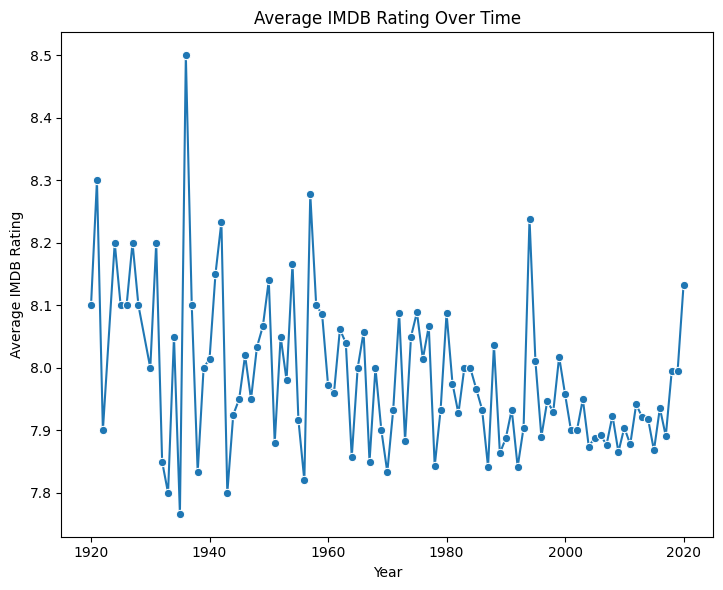

In [ ]:

yearly_trends = df.groupby('Released_Year').agg({'IMDB_Rating': 'mean'}).reset_index()

# Plot the trends over time
plt.figure(figsize=(14, 6))

# IMDB Rating Trend
plt.subplot(1, 2, 1)
sns.lineplot(x='Released_Year', y='IMDB_Rating', data=yearly_trends, marker='o')
plt.title('Average IMDB Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Average IMDB Rating')



# Show the plots
plt.tight_layout()
plt.show()


# Cut Movies into Decades

In [ ]:
df['Released_Year_Cut'].dtype

CategoricalDtype(categories=[(1919.999, 1959.0],   (1959.0, 1976.0],   (1976.0, 1991.0],
                    (1991.0, 1999.0],   (1999.0, 2004.0],   (2004.0, 2009.0],
                    (2009.0, 2014.0],   (2014.0, 2020.0]],
, ordered=True, categories_dtype=interval[float64, right])

# Feature engineering


Star_Power (Average Rating of the Four Main Stars)

In [ ]:
star_ratings = {}

for star in ['Star1','Star2','Star3','Star4']:
    star_avg_rating=df.groupby(star)['IMDB_Rating'].mean()
    star_ratings.update(star_avg_rating.to_dict())

def calculate_star_power(row):
    stars = [row['Star1'], row['Star2'], row['Star3'], row['Star4']]
    ratings = [star_ratings.get(star,0) for star in stars]
    return sum(ratings)/len(ratings)

df['Star_Power']=df.apply(calculate_star_power, axis=1)

df[['Series_Title', 'Star_Power']].head()

,Series_Title,Star_Power
0,The Shawshank Redemption,8.512500
1,The Godfather,8.700000
2,The Dark Knight,8.372917
3,The Godfather: Part II,8.333333
4,12 Angry Men,8.125000


Director_Rating (Average Rating of Director's Previous Movies)

In [ ]:
# Assuming data is loaded in a DataFrame called 'data'
# Ensure the data is sorted by year to calculate ratings for "previous" movies
df = df.sort_values(by='Released_Year')

# Step 1: Group the data by 'Director' and compute rolling mean (expanding window)
director_rating = df.groupby('Director')['IMDB_Rating'].expanding().mean().shift()

# Step 2: Reset the index of the computed ratings to match the original DataFrame
director_rating = director_rating.reset_index(level=0, drop=True)

# Step 3: Add the 'Director_Rating' back to the original DataFrame
df['Director_Rating'] = director_rating

# Step 4: Fill missing values (for directors with no previous movies) with the overall average rating
df['Director_Rating'].fillna(df['IMDB_Rating'].mean(), inplace=True)

# Inspect the new column
df[['Series_Title', 'Director', 'Director_Rating']].head()


/tmp/ipykernel_30/4173593658.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Director_Rating'].fillna(df['IMDB_Rating'].mean(), inplace=True)


,Series_Title,Director,Director_Rating
321,Das Cabinet des Dr. Caligari,Robert Wiene,7.800000
127,The Kid,Charles Chaplin,7.975000
568,Nosferatu,F.W. Murnau,7.800000
194,Sherlock Jr.,Buster Keaton,8.133333
193,The Gold Rush,Charles Chaplin,8.300000


Transform the Genre column by creating a new feature based on the number of genres a movie belongs to (e.g., count genres).

In [ ]:

# Step 1: Inspect the Genre column
print(df['Genre'].head())  # To see how genres are structured

# Step 2: Create a new column 'Genre_Count' by counting the number of genres per movie
df['Genre_Count'] = df['Genre'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

# Step 3: Inspect the new column
print(df[['Series_Title', 'Genre', 'Genre_Count']].head())


321    [Fantasy, Horror, Mystery]
127       [Comedy, Drama, Family]
568             [Fantasy, Horror]
194     [Action, Comedy, Romance]
193    [Adventure, Comedy, Drama]
Name: Genre, dtype: object


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# Predictive Modeling

In [ ]:
df.head(5)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Released_Year_Cut,Released_Year_range,Star_Power,Director_Rating
321,https://m.media-amazon.com/images/M/MV5BNWJiNG...,Das Cabinet des Dr. Caligari,1920.0,NaN,76 min,"[Fantasy, Horror, Mystery]",8.1,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",NaN,Robert Wiene,Werner Krauss,Conrad Veidt,Friedrich Feher,Lil Dagover,57428,0,"(1919.999, 1959.0]",0.0,8.100000,7.800000
127,https://m.media-amazon.com/images/M/MV5BZjhhMT...,The Kid,1921.0,Passed,68 min,"[Comedy, Drama, Family]",8.3,"The Tramp cares for an abandoned child, but ev...",NaN,Charles Chaplin,Charles Chaplin,Edna Purviance,Jackie Coogan,Carl Miller,113314,"5,450,000","(1919.999, 1959.0]",1.0,8.308333,7.975000
568,https://m.media-amazon.com/images/M/MV5BMTAxYj...,Nosferatu,1922.0,NaN,94 min,"[Fantasy, Horror]",7.9,Vampire Count Orlok expresses interest in a ne...,NaN,F.W. Murnau,Max Schreck,Alexander Granach,Gustav von Wangenheim,Greta Schröder,88794,0,"(1919.999, 1959.0]",1.0,7.900000,7.800000
194,https://m.media-amazon.com/images/M/MV5BZWFhOG...,Sherlock Jr.,1924.0,Passed,45 min,"[Action, Comedy, Romance]",8.2,"A film projectionist longs to be a detective, ...",NaN,Buster Keaton,Buster Keaton,Kathryn McGuire,Joe Keaton,Erwin Connelly,41985,"977,375","(1919.999, 1959.0]",1.0,8.175000,8.133333
193,https://m.media-amazon.com/images/M/MV5BZjEyOT...,The Gold Rush,1925.0,Passed,95 min,"[Adventure, Comedy, Drama]",8.2,A prospector goes to the Klondike in search of...,NaN,Charles Chaplin,Charles Chaplin,Mack Swain,Tom Murray,Henry Bergman,101053,"5,450,000","(1919.999, 1959.0]",1.0,8.233333,8.300000


Split the data into training and testing sets.


In [ ]:
df['Runtime']=df['Runtime'].str.split(pat=' ').str[0]


Train a regression model to predict IMDB_Rating based on features like Gross, No_of_Votes, Runtime, Genre_Count, and Star_Power.

In [ ]:
features = ['Runtime', 'Genre', 'Director_Rating', 'Star_Power']
X = df[features]  # Features
y = df['IMDB_Rating']  # Target

# Step 2: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Output the sizes of the training and testing sets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 800 samples
Testing set size: 200 samples


In [ ]:
# # Step 1: Check the types of the feature columns
# print(X.dtypes)

# # Step 2: Convert any object columns to numeric using .loc
# for col in features:
#     if col != 'Genre':
#         X.loc[:, col] = pd.to_numeric(X[col], errors='coerce')

# # Step 3: Check for any missing values after the conversion
# print(X.isnull().sum())

# # Step 4: Optionally, fill missing values with the median using .loc
# X.loc[:, :] = X.fillna(X.median())

# # Step 5: Verify the types and DataFrame's integrity again
# print(X.dtypes)
# print(X.head())


In [ ]:
# Check the types of the feature columns
print(X.dtypes)

In [ ]:
print(X_train.head())  # Check the first few rows of the training features
print(X_train.dtypes)  # Check the data types of each feature column


In [ ]:
# Step 3: Train a Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Step 4: Predict using Linear Regression
y_pred_linear = linear_reg.predict(X_test)

# # Step 5: Train a Decision Tree Regressor
# tree_reg = DecisionTreeRegressor(random_state=42)
# tree_reg.fit(X_train, y_train)

# # Step 6: Predict using Decision Tree
# y_pred_tree = tree_reg.predict(X_test)

# # Step 7: Train a Random Forest Regressor
# forest_reg = RandomForestRegressor(random_state=42, n_estimators=100)
# forest_reg.fit(X_train, y_train)

# # Step 8: Predict using Random Forest
# y_pred_forest = forest_reg.predict(X_test)

# Step 9: Evaluate models with Mean Squared Error and R² score
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse:.4f}, R² Score: {r2:.4f}")

evaluate_model(y_test, y_pred_linear, "Linear Regression")
# evaluate_model(y_test, y_pred_tree, "Decision Tree")
# evaluate_model(y_test, y_pred_forest, "Random Forest")

In [ ]:
i left the upper code unfinished , because it pissed me of, hope so will return to it later............